<a href="https://colab.research.google.com/github/eapzz/mycode/blob/main/Medimag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
weights = torch.ones(1,5,requires_grad=True)


In [ ]:
for epoch in range(1):
  output = (weights*3).sum()
  output.backward()
  print(weights.grad)



tensor([[12., 12., 12., 12., 12.]])


In [ ]:
for epoch in range(1):
  output = (weights*3).sum()
  output.backward(Y)
  print(weights.grad)
  weights.grad.zero_()


tensor([[18., 18., 18., 18., 18.]])


In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([3, 6, 9, 12], dtype=np.float32)
w = 0
n = 0.1

def forward(x):
    return w * x

def loss(y_pred):
    return np.mean((y_pred - Y) ** 2)

def grad(y_pred):
    return np.mean(2 * (y_pred - Y) * X)

def graddes():
    y_pred = forward(X)
    loss_val = loss(y_pred)
    f1 = grad(y_pred)
    w1 = w - n * f1
    return w1, loss_val

for i in range(5):
    w, loss_val = graddes()
    print("Iteration:", i+1, "Weight:", w, "Loss:", loss_val)


Iteration: 1 Weight: 4.5 Loss: 67.5
Iteration: 2 Weight: 2.25 Loss: 16.875
Iteration: 3 Weight: 3.375 Loss: 4.21875
Iteration: 4 Weight: 2.8125 Loss: 1.0546875
Iteration: 5 Weight: 3.09375 Loss: 0.26367188


In [ ]:
print("Prediction before training", forward(5))

Prediction before training 15.46875


In [15]:
import torch.nn as nn
x=torch.tensor([1,2,3,4], dtype=torch.float32)
y=torch.tensor([3,6,9,12], dtype = torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model Prediction
def forward(x):
    return w*x

print("Prediction before training: ", forward(5))

#Training

learning_rate=0.01
n_iter=30
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iter):
        y_pred=forward(x)
        l =loss(y,y_pred)
        optimizer.zero_grad()

        if epoch % 5==0:
            print("epoch = ", epoch+1, "weight = ", w, "loss = ",l.item())

print("Prediction after training", forward(5))

Prediction before training:  tensor(0., grad_fn=<MulBackward0>)
epoch =  1 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  6 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  11 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  16 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  21 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  26 weight =  tensor(0., requires_grad=True) loss =  67.5
Prediction after training tensor(0., grad_fn=<MulBackward0>)


In [17]:
x=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y=torch.tensor([[3],[6],[9],[12]], dtype = torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print("Prediction before training: ", model(x_test).item())

#Training

learning_rate = 0.01
n_iter = 30
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iter):
        y_pred=forward(x)
        l =loss(y,y_pred)
        optimizer.zero_grad()

        if epoch % 5==0:
            print("epoch = ", epoch+1, "weight = ", w, "loss = ",l.item())

print("Prediction after training", forward(5))

4 1
Prediction before training:  3.4744162559509277
epoch =  1 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  6 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  11 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  16 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  21 weight =  tensor(0., requires_grad=True) loss =  67.5
epoch =  26 weight =  tensor(0., requires_grad=True) loss =  67.5
Prediction after training tensor(0., grad_fn=<MulBackward0>)


Prediction after training tensor(14.8855, grad_fn=<MulBackward0>)


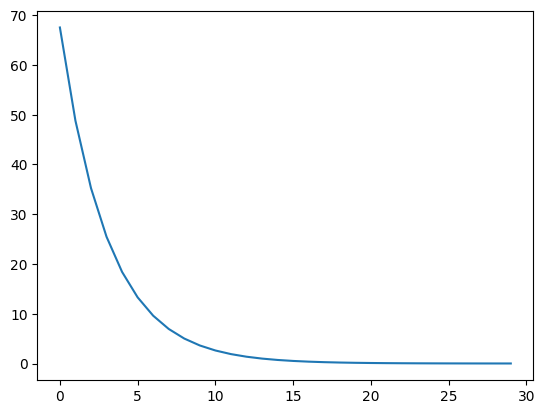

In [18]:
training_loss = []

for epoch in range(n_iter):
        y_pred=forward(x)
        l =loss(y,y_pred)

        l.backward()

        optimizer.step()

        optimizer.zero_grad()

        training_loss.append(l.item())

import matplotlib.pyplot as plt
plt.plot(training_loss)

  #      if epoch % 5==0:
   #        print("epoch = ", epoch+1, "weight = ", w, "loss = ",l.item())

print("Prediction after training", forward(5))